<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_4_NLP_IMDB(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Video](https://youtu.be/C9UdVPE3ynA) / [Lesson Forum](https://forums.fast.ai/t/lesson-4-official-resources-and-updates/30317)

Welcome to Lesson 4! We are going to finish our journey through these key applications. We've already looked at a range of vision applications. We've looked a classification, localization, image regression. We briefly touched on NLP. We're going to do a deeper dive into NLP transfer learning today. We're going to then look at tabular data and collaborative filtering which are both super useful applications.

Then we're going to take a complete u-turn. We're going to take that collaborative filtering example and dive deeply into it to understand exactly what's happening mathematically﹣exactly what's happening in the computer. And we're going to use that to gradually go back in reverse order through the applications again in order to understand exactly what's going on behind the scenes of all of those applications.

**Correction on CamVid result**

Before we do, somebody on the forum is kind enough to point out that when we compared ourselves to what we think might be the state of the art or was recently the state of the art for CamVid, there wasn't a fair comparison because the paper actually used a small subset of the classes, and we used all of the classes. So Jason in our study group was kind enough to rerun the experiments with the correct subset of classes from the paper, and our accuracy went up to 94% compared to 91.5% of the paper. So I think that's a really cool result. and a great example of how pretty much just using the defaults nowadays can get you far beyond what was the best of a year or two ago. It was certainly the best last year when we were doing this course because we started it quite intensely. So that's really exciting.




#Natural Language Processing (NLP) [2:00](https://youtu.be/C9UdVPE3ynA?t=120)

What I wanted to start with is going back over NLP a little bit to understand really what was going on there.

**A quick review**

So first of all, a quick review. Remember NLP is natural language processing. It's about taking text and doing something with it. Text classification is particularly useful﹣practically useful applications. It's what we're going to start off focusing on. Because classifying a text or classifying a document can be used for anything from:

- Spam prevention
- Identifying fake news
- Finding a diagnosis from medical reports
- Finding mentions of your product in Twitter

So it's pretty interesting. And actually there was a great example during the week from one of our students @howkhang who is a lawyer and he mentioned on the forum that he had a really great results from classifying legal texts using this NLP approach. And I thought this was a great example. This is the post that they presented at an academic conference this week describing the approach:

This series of three steps that you see here (and I'm sure you recognize this classification matrix) is what we're going to start by digging into.

![alt text](https://github.com/hiromis/notes/raw/master/lesson4/1.png?raw=true)

We're going to start out with a movie review like this one and decide whether it's positive or negative sentiment about the movie. That is the problem. We have, in the training set, 25,000 movie reviews and for each one we have like one bit of information: they liked it, or they didn't like it. That's what we're going to look into a lot more detail today and in the current lessons. Our neural networks (remember, they're just a bunch of matrix multiplies and simple nonlinearities﹣particularly replacing negatives with zeros), those weight matrices start out random. So if you start out with with some random parameters and try to train those parameters to learn how to recognize positive vs. negative movie reviews, you literally have 25,000 ones and zeros to actually tell you I like this one I don't like that one. That's clearly not enough information to learn, basically, how to speak English﹣how to speak English well enough to recognize they liked this or they didn't like this. Sometimes that can be pretty nuanced. Particularly with movie reviews because these are like online movie reviews on IMDB, people can often use sarcasm. It could be really quite tricky.

Until very recently, in fact, this year, neural nets didn't do a good job at all of this kind of classification problem. And that was why﹣there's not enough information available. So the trick, hopefully you can all guess, is to use transfer learning. It's always the trick.

Last year in this course I tried something crazy which was I thought what if I try transform learning to demonstrate that it can work for NLP as well. I tried it out and it worked extraordinarily well. So here we are, a year later, and transfer learning in NLP is absolutely the hit thing. And I'm going to describe to you what happens.



##Transfer learning in NLP [6:04](https://youtu.be/C9UdVPE3ynA?t=364)

The key thing is we're going to start with the same kind of thing that we used for computer vision﹣a pre-trained model that's been trained to do something different to what we're doing with it. For ImageNet, that was originally built as a model to predict which of a thousand categories each photo falls into. And people then fine-tune that for all kinds of different things as you've seen. So we're going to start with a pre-trained model that's going to do something else. Not movie review classification. We're going to start with a pre-trained model which is called a language model. **(my note)---> Image classification can use pre-trained model to predict new dataset but with text classification, we have to go with a language model first then do classification.**

A language model has a very specific meaning in NLP and it's this. A language model is a model that learns to predict the next word of a sentence. To predict the next word of a sentence, you actually have to know quite a lot about English (assuming you're doing it in English) and quite a lot of world knowledge. By world knowledge, I'll give you an example.

Here's your language model and it has read:

- "I'd like to eat a hot ___": Obviously, "dog", right?

- "It was a hot ___": Probably "day"


**Now previous approaches to NLP use something called n-grams largely which is basically saying how often do these pairs or triplets of words tend to appear next to each other. And n-grams are terrible at this kind of thing. As you can see, there's not enough information here to decide what the next word probably is. But with a neural net, you absolutely can**.

So here's the nice thing. If you train a neural net to predict the next word of a sentence then you actually have a lot of information. Rather than having a single bit to every 2,000 word movie review: "liked it" or "didn't like it", every single word, you can try and predict the next word. So in a 2,000 word movie review, there are 1,999 opportunities to predict the next word. Better still, you don't just have to look at movie reviews. Because really the hard thing isn't so much as "does this person like the movie or not?" but "how do you speak English?". So you can learn "how do you speak English?" (roughly) from some much bigger set of documents. So what we did was we started with Wikipedia.

##Wikitext 103 [8:30](https://youtu.be/C9UdVPE3ynA?t=510)

Stephen Merity and some of his colleagues built something called Wikitext 103 dataset which is simply a subset of most of the largest articles from Wikipedia with a little bit of pre-processing that's available for download. So you're basically grabbing Wikipedia and then I built a language model on all of Wikipedia. So I just built a neural net which would predict the next word in every significantly sized Wikipedia article. That's a lot of information. If I remember correctly, it's something like a billion tokens. So we've got a billion separate things to predict. Every time we make a mistake on one of those predictions, we get the loss, we get gradients from that, and we can update our weights, and they can better and better until we can get pretty good at predicting the next word of Wikipedia.

Why is that useful? Because at that point, I've got a model that knows probably how to complete sentences like this, so it knows quite a lot about English and quite a lot about how the world works﹣what kinds of things tend to be hot in different situations, for instance. Ideally, it would learn things like "in 1996 in a speech to the United Nations, United States president _____ said "... Now that would be a really good language model, because it would actually have to know who is this United States president in that year. So getting really good at training language models is a great way to teach a neural-net a lot about what is our world, what's in our world, how do things work in our world. It's a really fascinating topic, and it's actually one that philosophers have been studying for hundreds of years now. There's actually a whole theory of philosophy which is about what can be learned from studying language alone. So it turns out, apparently, quite a lot.

So here's the interesting thing. You can start by training a language model on all of Wikipedia, and then we can make that available to all of you. Just like a pre-trained ImageNet model for vision, we've now made available a pre-trained Wikitext model for NLP not because it's particularly useful of itself (predicting the next word of sentences is somewhat useful, but not normally what we want to do), but it's a model that understands a lot about language and a lot about what language describes. So then, we can take that and we can do transfer learning to create a new language model that's specifically good at predicting the next word of movie reviews.

##Fine-tuning Wikitext to create a new language model [11:10](https://youtu.be/C9UdVPE3ynA?t=670)

If we can build a language model that's good at predicting the next word of movie reviews pre-trained with the Wikitext model, then that's going to understand a lot about "my favorite actor is Tom ____. " Or "I thought the photography was fantastic but I wasn't really so happy about the _____ (director)." It's going to learn a lot about specifically how movie reviews are written. It'll even learn things like what are the names of some popular movies.

**That would then mean we can still use a huge corpus of lots of movie reviews even if we don't know whether they're positive or negative to learn a lot about how movie reviews are written. So for all of this pre-training and all of this language model fine-tuning, we don't need any labels at all. It is what the researcher Yann LeCun calls self supervised learning**. In other words, it's a classic supervised model﹣we have labels, but the labels are not things that somebody else have created. They're built into the dataset itself. So this is really really neat. Because at this point, we've now got something that's good at understanding movie reviews and we can fine-tune that with transfer learning to do the thing we want to do which in this case is to classify movie reviews to be positive or negative. So my hope was (when I tried this last year) that at that point, 25,000 ones and zeros would be enough feedback to fine-tune that model and it turned out it absolutely was.

**Question**: Does the language model approach works for text in forums that are informal English, misspelled words or slangs or shortforms like s6 instead of Samsung S 6? [12:47](https://youtu.be/C9UdVPE3ynA?t=767)

- Yes, absolutely it does. Particularly if you start with your wikitext model and then fine-tune it with your "target" corpus. Corpus is just a bunch of documents (emails, tweets, medical reports, or whatever). You could fine-tune it so it can learn a bit about the specifics of the slang , abbreviations, or whatever that didn't appear in the full corpus. So interestingly, this is one of the big things that people were surprised about when we did this research last year. People thought that learning from something like Wikipedia wouldn't be that helpful because it's not that representative of how people tend to write. But it turns out it's extremely helpful because there's a much a difference between Wikipedia and random words than there is between like Wikipedia and reddit. So it kind of gets you 99% of the way there.

So language models themselves can be quite powerful. For example there was a [blog post](https://blog.swiftkey.com/swiftkey-debuts-worlds-first-smartphone-keyboard-powered-by-neural-networks/) from SwiftKey (the folks that do the mobile-phone predictive text keyboard) and they describe how they kind of rewrote their underlying model to use neural nets. This was a year or two ago. Now most phone keyboards seem to do this. You'll be typing away on your mobile phone, and in the prediction there will be something telling you what word you might want next. So that's a language model in your phone.

Another example was the researcher Andrej Karpathy who now runs all this stuff at Tesla, back when he was a PhD student, he created [a language model of text in LaTeX documents] and created these automatic generation of LaTeX documents that then became these automatically generated papers. That's pretty cute.

We're not really that interested in the output of the language model ourselves. We're just interested in it because it's helpful with this process.

#Review of the basic process [15:14](https://youtu.be/C9UdVPE3ynA?t=914)



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.text import *

**Preparing the data**

First let's download the dataset we are going to study. The dataset has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


So there's an example of a movie review:

In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code.

So you can just go TextDataBunch.from_csv to grab a language model specific data bunch:

In [0]:
data_lm = TextDataBunch.from_csv(path,'texts.csv')

And then you can create a learner from that in the usual way and fit it. 

By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A TextDataBunch does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.



In [0]:
data_lm.save()

You can save the data bunch which means that the pre-processing that is done, you don't have to do it again. You can just load it.

In [0]:
data = load_data(path)

In [9]:
'''
??load_data

def load_data(path:PathOrStr, file:PathLikeOrBinaryStream='data_save.pkl', bs:int=64, val_bs:int=None, num_workers:int=defaults.cpus,
              dl_tfms:Optional[Collection[Callable]]=None, device:torch.device=None, collate_fn:Callable=data_collate,
              no_check:bool=False, **kwargs)->DataBunch:
              
    "Load a saved `DataBunch` from `path/file`. `file` can be file-like (file or buffer)"
    
    source = Path(path)/file if is_pathlike(file) else file
    ll = torch.load(source, map_location='cpu') if defaults.device == torch.device('cpu') else torch.load(source)
    return ll.databunch(path=path, bs=bs, val_bs=val_bs, num_workers=num_workers, dl_tfms=dl_tfms, device=device,
                        collate_fn=collate_fn, no_check=no_check, **kwargs)
                
'''

'\n??load_data\n\ndef load_data(path:PathOrStr, file:PathLikeOrBinaryStream=\'data_save.pkl\', bs:int=64, val_bs:int=None, num_workers:int=defaults.cpus,\n              dl_tfms:Optional[Collection[Callable]]=None, device:torch.device=None, collate_fn:Callable=data_collate,\n              no_check:bool=False, **kwargs)->DataBunch:\n              \n    "Load a saved `DataBunch` from `path/file`. `file` can be file-like (file or buffer)"\n    \n    source = Path(path)/file if is_pathlike(file) else file\n    ll = torch.load(source, map_location=\'cpu\') if defaults.device == torch.device(\'cpu\') else torch.load(source)\n    return ll.databunch(path=path, bs=bs, val_bs=val_bs, num_workers=num_workers, dl_tfms=dl_tfms, device=device,\n                        collate_fn=collate_fn, no_check=no_check, **kwargs)\n                \n'

What happens behind the scenes if we now load it as a classification data bunch (that's going to allow us to see the labels as well)?

##Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [10]:
data = TextClasDataBunch.from_csv(path,'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols:

- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

##Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token UNK.

The correspondance from ids to tokens is stored in the vocab attribute of our datasets, in a dictionary call

In [11]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

And that big list of unique possible tokens is called the vocabulary which we just call it a "vocab". So what we then do is we replace the tokens with the ID of where is that token in the vocab:

In [12]:
data.train_ds[0][0]

Text xxbos ... okay , maybe not all of it . xxmaj xxunk by the false promise of bikini - clad women on the movie 's cover ... but the xxup horror ... xxup the xxup horror ... ... whatever you do , do xxup not watch this movie . xxmaj xxunk out your eyes , repeatedly xxunk your skull in ... do what it takes . xxmaj never again -- never forget ! 
 
 

But the underlying data is all numbers

In [13]:
data.train_ds[0][0].data[:10]

array([  2, 101, 946,  11, 284,  39,  46,  14,  17,  10])

That's numericalization. Here's the thing though. As you'll learn, every word in our vocab is going to require a separate row in a weight matrix in our neural net. So to avoid that weight matrix getting too huge, that why we restrict the vocab to no more than (by default) 60,000 words. And if a word doesn't appear more than two times, we don't put it in the vocab either. So we keep the vocab to a reasonable size in that way. When you see these xxunk, that's an unknown token. It just means this was something that was not a common enough word to appear in our vocab.

We also have a couple of other special tokens like (see fastai.text.transform.py for up-to-date info):

xxfld: This is a special thing where if you've got like title, summary, abstract, body, (i. e. separate parts of a document), each one will get a separate field and so they will get numbered (e.g. xxfld 2).
xxup: If there's something in all caps, it gets lower cased and a token called xxup will get added to it.

##With the data block API [18:31](https://youtu.be/C9UdVPE3ynA?t=1111)

Personally, I more often use the data block API because there's less to remember about exactly what data bunch to use, and what parameters and so forth, and it can be a bit more flexible.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [0]:
data = (TextList.from_csv(path,'texts.csv',cols='text')
       .split_from_df(col=2)
       .label_from_df(cols=0)
       .databunch())

So another approach to doing this is to just decide:

- What kind of list you're creating (i.e. what's your independent variable)? So in this case, my independent variable is text.
- What is it coming from? A CSV.
- How do you want to split it into validation versus training? So in this case, column number two was the is_valid flag.
- How do you want to label it? With positive or negative sentiment, for example. So column zero had that.
- Then turn that into a data bunch.

## Language model

Now let's grab the full dataset for what follows.

First, note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs = 48

In [16]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [17]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

Now let's grab the whole data set which has:

- 25,000 reviews in training
- 25,000 interviews in validation
- 50,000 unsupervised movie reviews (50,000 movie reviews that haven't been scored at all)

We're going to start with the language model. Now the good news is, we don't have to train the Wikitext 103 language model. Not that it's difficult﹣you can just download the wikitext 103 corpus, and run the same code. But it takes two or three days on a decent GPU, so not much point in you doing it. You may as well start with ours. Even if you've got a big corpus of like medical documents or legal documents, you should still start with Wikitext 103. There's just no reason to start with random weights. It's always good to use transfer learning if you can.

So we're gonna start fine-tuning our IMDB language model.



```
The reviews are in a training and test set following an imagenet structure. The only difference is that there is an unsup folder on top of  train and test that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called wikitext-103). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).
```



In [0]:
data_lm = (TextList.from_folder(path)
          #Input: all the text files in path
          .filter_by_folder(include=['train','test','unsub'])
          # We may have other temp folders that contain text files so we only 
          # keep what is in train and test 
          .split_by_rand_pct(0.1)
           # we randomly split and keep 10% (10,000 reviews) for validation
          .label_for_lm()
           # we want to do a language model so we label accordingly
          .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of TextDataBunch for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

We can say:

- It's a list of text files﹣the full IMDB actually is not in a CSV. Each document is a separate text file.
- Say where it is﹣in this case we have to make sure we just to include the train and test folders.
- We randomly split it by 0.1.

    - Now this is interesting﹣10%. **Why are we randomly splitting it by 10% rather than using the predefined train and test they gave us? This is one of the cool things about transfer learning**. Even though our validation set has to be held aside, it's actually only the labels that we have to keep aside. So we're not allowed to use the labels in the test set. If you think about in a Kaggle competition, you certainly can't use the labels because they don't even give them to you. But you can certainly use the independent variables. So in this case, you could absolutely use the text that is in the test set to train your language model. **This is a good trick﹣when you do the language model, concatenate the training and test set together, and then just split out a smaller validation set so you've got more data to train your language model. So that's a little trick**.

    - So if you're doing NLP stuff on Kaggle, for example, or you've just got a smaller subset of labeled data, make sure that you use all of the text you have to train in your language model, because there's no reason not to.

- How are we going to label it? Remember, a language model kind of has its own labels. The text itself is labels so label for a language model (label_for_lm) does that for us.
- And create a data bunch and save it. That takes a few minutes to tokenize and numericalize.

Since it takes some few minutes, we save it. Later on you can just load it. No need to run it again.

In [0]:
data_lm = load_data(path,'data_lm.pkl',bs=bs)

In [20]:
data_lm.show_batch()

idx,text
0,"is due to the fact that xxmaj gunnar xxmaj hansen appears ( ever so briefly ) as one of the film 's reprehensible characters . xxmaj how they ever lured xxmaj mr. xxmaj hansen into this piece of ... work , i 'll never know . xxmaj the story idea is interesting but poorly executed . xxmaj the direction is pedestrian and the acting is mediocre . xxmaj the only"
1,"n't try to create a tiny bit of tension . xxmaj the director ( xxmaj stephen xxmaj carpenter -- i guess it 's much easier to find money with a name like that ) also made the xxmaj kindred ( 1986 ) wich was rather enjoyable and recently he did xxmaj soul xxmaj survivors . xxmaj complete crap as well , but at least that one had xxmaj eliza xxmaj"
2,"a daft little horror film that harks back to the style of eighties woodland flicks , you might find some enjoyment here . xxbos xxmaj in my opinion this movie advances no new thought . seems to me like taking a spear to a spear without looking to the side ! the director seems to have an agenda ! xxmaj duh ! i find that his rational is lacking there"
3,it strayed into here is xxunk guess . \n \n xxmaj there is other great stock footage of xxmaj ottawa in the old days when the capital of xxmaj canada was a wide spot in the road and especially wonderful footage of xxmaj new xxmaj york xxmaj city 's xxmaj times xxmaj square during one of the xxmaj civil xxmaj defense xxmaj drills in the early 50s . \n
4,"then at least it was n't a total waste . xxmaj you 'd never know by watching it though . xxmaj script ? xxmaj are you kidding . xxmaj acting ? i think even the trees were faking . xxmaj cinematography ? xxmaj well , there must 've been a camera there . xxmaj period . i do n't think there was any actual planning involved in the making of"


###Training the language model [22:29](https://youtu.be/C9UdVPE3ynA?t=1349)

At this point things are going to look very familiar. We create a learner:

In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)


But instead of creating a CNN learner, we're going to create a language model learner. So behind the scenes, this is actually not going to create a CNN (a convolutional neural network), it's going to create an RNN (a recurrent neural network). We're going to be learning exactly how they're built over the coming lessons, but in short they're the same basic structure. The input goes into a weight matrix (i.e. a matrix multiply), that then you replace the negatives with zeros, and it goes into another matrix multiply, and so forth a bunch of times. So it's the same basic structure.

As usual, when we create a learner, you have to pass in two things:

- The data: so here's our language model data
- What pre-trained model we want to use: here, the pre-trained model is the Wikitext 103 model (arch= AWD_LSTM) that will be downloaded for you from fastai if you haven't used it before just like ImageNet pre-trained models are downloaded for you.
This here (drop_mult=0.3) sets the amount of dropout. We haven't talked about that yet. We've talked briefly about this idea that there is something called regularization and you can reduce the regularization to avoid underfitting. So for now, just know that by using a number lower than one is because when I first tried to run this, I was under fitting. So if you reduced that number, then it will avoid under fitting.

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [23]:
'''
??language_model_learner

def language_model_learner(data:DataBunch, arch, config:dict=None, drop_mult:float=1., pretrained:bool=True,
                           pretrained_fnames:OptStrTuple=None, **learn_kwargs) -> 'LanguageLearner':
    "Create a `Learner` with a language model from `data` and `arch`."
    model = get_language_model(arch, len(data.vocab.itos), config=config, drop_mult=drop_mult)
    meta = _model_meta[arch]
    learn = LanguageLearner(data, model, split_func=meta['split_lm'], **learn_kwargs)
    if pretrained:
        if 'url' not in meta: 
            warn("There are no pretrained weights for that architecture yet!")
            return learn
        model_path = untar_data(meta['url'], data=False)
        fnames = [list(model_path.glob(f'*.{ext}'))[0] for ext in ['pth', 'pkl']]
        learn.load_pretrained(*fnames)
        learn.freeze()
    if pretrained_fnames is not None:
        fnames = [learn.path/learn.model_dir/f'{fn}.{ext}' for fn,ext in zip(pretrained_fnames, ['pth', 'pkl'])]
        learn.load_pretrained(*fnames)
        learn.freeze()
    return learn
    
'''

'\n??language_model_learner\n\ndef language_model_learner(data:DataBunch, arch, config:dict=None, drop_mult:float=1., pretrained:bool=True,\n                           pretrained_fnames:OptStrTuple=None, **learn_kwargs) -> \'LanguageLearner\':\n    "Create a `Learner` with a language model from `data` and `arch`."\n    model = get_language_model(arch, len(data.vocab.itos), config=config, drop_mult=drop_mult)\n    meta = _model_meta[arch]\n    learn = LanguageLearner(data, model, split_func=meta[\'split_lm\'], **learn_kwargs)\n    if pretrained:\n        if \'url\' not in meta: \n            warn("There are no pretrained weights for that architecture yet!")\n            return learn\n        model_path = untar_data(meta[\'url\'], data=False)\n        fnames = [list(model_path.glob(f\'*.{ext}\'))[0] for ext in [\'pth\', \'pkl\']]\n        learn.load_pretrained(*fnames)\n        learn.freeze()\n    if pretrained_fnames is not None:\n        fnames = [learn.path/learn.model_dir/f\'{fn}.{ex

In [24]:
'''
??AWD_LSTM

class AWD_LSTM(nn.Module):
    "AWD-LSTM/QRNN inspired by https://arxiv.org/abs/1708.02182."

    initrange=0.1

    def __init__(self, vocab_sz:int, emb_sz:int, n_hid:int, n_layers:int, pad_token:int=1, hidden_p:float=0.2,
                 input_p:float=0.6, embed_p:float=0.1, weight_p:float=0.5, qrnn:bool=False, bidir:bool=False):
        super().__init__()
        self.bs,self.qrnn,self.emb_sz,self.n_hid,self.n_layers = 1,qrnn,emb_sz,n_hid,n_layers
        self.n_dir = 2 if bidir else 1
        self.encoder = nn.Embedding(vocab_sz, emb_sz, padding_idx=pad_token)
        self.encoder_dp = EmbeddingDropout(self.encoder, embed_p)
        if self.qrnn:
            #Using QRNN requires an installation of cuda
            from .qrnn import QRNN
            self.rnns = [QRNN(emb_sz if l == 0 else n_hid, n_hid if l != n_layers - 1 else emb_sz, 1,
                              save_prev_x=True, zoneout=0, window=2 if l == 0 else 1, output_gate=True) 
                         for l in range(n_layers)]
            for rnn in self.rnns: 
                rnn.layers[0].linear = WeightDropout(rnn.layers[0].linear, weight_p, layer_names=['weight'])
        else:
            self.rnns = [nn.LSTM(emb_sz if l == 0 else n_hid, (n_hid if l != n_layers - 1 else emb_sz)//self.n_dir, 1,
                                 batch_first=True, bidirectional=bidir) for l in range(n_layers)]
            self.rnns = [WeightDropout(rnn, weight_p) for rnn in self.rnns]
        self.rnns = nn.ModuleList(self.rnns)
        self.encoder.weight.data.uniform_(-self.initrange, self.initrange)
        self.input_dp = RNNDropout(input_p)
        self.hidden_dps = nn.ModuleList([RNNDropout(hidden_p) for l in range(n_layers)])

    def forward(self, input:Tensor, from_embeddings:bool=False)->Tuple[Tensor,Tensor]:
        if from_embeddings: bs,sl,es = input.size()
        else: bs,sl = input.size()
        if bs!=self.bs:
            self.bs=bs
            self.reset()
        raw_output = self.input_dp(input if from_embeddings else self.encoder_dp(input))
        new_hidden,raw_outputs,outputs = [],[],[]
        for l, (rnn,hid_dp) in enumerate(zip(self.rnns, self.hidden_dps)):
            raw_output, new_h = rnn(raw_output, self.hidden[l])
            new_hidden.append(new_h)
            raw_outputs.append(raw_output)
            if l != self.n_layers - 1: raw_output = hid_dp(raw_output)
            outputs.append(raw_output)
        self.hidden = to_detach(new_hidden, cpu=False)
        return raw_outputs, outputs

    def _one_hidden(self, l:int)->Tensor:
        "Return one hidden state."
        nh = (self.n_hid if l != self.n_layers - 1 else self.emb_sz) // self.n_dir
        return one_param(self).new(1, self.bs, nh).zero_()

    def select_hidden(self, idxs):
        if self.qrnn: self.hidden = [h[:,idxs,:] for h in self.hidden]
        else: self.hidden = [(h[0][:,idxs,:],h[1][:,idxs,:]) for h in self.hidden]
        self.bs = len(idxs)

    def reset(self):
        "Reset the hidden states."
        [r.reset() for r in self.rnns if hasattr(r, 'reset')]
        if self.qrnn: self.hidden = [self._one_hidden(l) for l in range(self.n_layers)]
        else: self.hidden = [(self._one_hidden(l), self._one_hidden(l)) for l in range(self.n_layers)]
        
'''

'\n??AWD_LSTM\n\nclass AWD_LSTM(nn.Module):\n    "AWD-LSTM/QRNN inspired by https://arxiv.org/abs/1708.02182."\n\n    initrange=0.1\n\n    def __init__(self, vocab_sz:int, emb_sz:int, n_hid:int, n_layers:int, pad_token:int=1, hidden_p:float=0.2,\n                 input_p:float=0.6, embed_p:float=0.1, weight_p:float=0.5, qrnn:bool=False, bidir:bool=False):\n        super().__init__()\n        self.bs,self.qrnn,self.emb_sz,self.n_hid,self.n_layers = 1,qrnn,emb_sz,n_hid,n_layers\n        self.n_dir = 2 if bidir else 1\n        self.encoder = nn.Embedding(vocab_sz, emb_sz, padding_idx=pad_token)\n        self.encoder_dp = EmbeddingDropout(self.encoder, embed_p)\n        if self.qrnn:\n            #Using QRNN requires an installation of cuda\n            from .qrnn import QRNN\n            self.rnns = [QRNN(emb_sz if l == 0 else n_hid, n_hid if l != n_layers - 1 else emb_sz, 1,\n                              save_prev_x=True, zoneout=0, window=2 if l == 0 else 1, output_gate=True) \n       

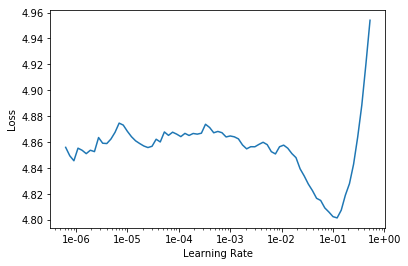

In [25]:
learn.recorder.plot(skip_end=15)

Then we can fit one cycle.

In [26]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.185115,4.040494,0.293801,20:37


In [0]:
learn.save('fit_head')

In [55]:
learn.load('fit_head')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxup ok this movie had a terrible premise . xxmaj be serious according to the movie they had just been through an apocalyptic war yet they have money to buy huge robots and pit them against each other . xxmaj each country decides instead of investing into rebuilding their country they would rather fight with robots no one could afford . xxmaj here 's a better idea , lets rely on our most inept resource , jocks , to fight our battles . 
 
  xxmaj everyone says what about the director , what about him . xxmaj he makes a good movie , he makes a bad movie . xxmaj there is no reason to give this movie some credit just because of the director , maybe he was asleep ? i thoroughly enjoyed this movie , because it was so cheesy and ridiculous i had to laugh . i actually had a good time watching it , well except for the cowboy mentor who turns out to be an xxunk me no one would see this guy as an assassin , so it

What's happening here is we are just fine-tuning the last layers. Normally after we fine-tune the last layers, the next thing we do is we go unfreeze and train the whole thing. So here it is:

In [0]:
learn.unfreeze()

In [30]:
learn.fit_one_cycle(1,1e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.889421,3.835869,0.316218,23:46


As you can see, even on a pretty beefy GPU that takes two or three hours. In fact, I'm still under fitting. So probably tonight, I might train it overnight and try and do a little bit better. I'm guessing I could probably train this a bit longer because you can see the accuracy hasn't started going down again. So I wouldn't mind try to train that a bit longer. But the accuracy, it's interesting. 0.3 means we're guessing the next word of the movie review correctly about a third of the time. That sounds like a pretty high number﹣the idea that you can actually guess the next word that often. So it's a good sign that my language model is doing pretty well. For more limited domain documents (like medical transcripts and legal transcripts), you'll often find this accuracy gets a lot higher. So sometimes this can be even 50% or more. But 0.3 or more is pretty good.

In [0]:
learn.save('fine_tuned')

###Predicting with Language Model [25:43](https://youtu.be/C9UdVPE3ynA?t=1543)

You can now run **learn.predict** and pass in the start of a sentence, and it will try and finish off that sentence for you.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = 'I liked this movie because'
N_WORDS = 40
N_SENTENCES = 2

In [34]:
print('\n'.join(learn.predict(TEXT,N_WORDS,temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it 's a nice subject than The Da Vinci Code . i feel that i 've grown into a - movie when i saw the movie ! Because i was in the juvenile watching it
I liked this movie because it was great . i loved it . The movie has a good storyline and that i am a big fan of classic movies . This movie is a great movie , it has a great cast ,


Now I should mention, this is not designed to be a good text generation system. This is really more designed to check that it seems to be creating something that's vaguely sensible. There's a lot lot of tricks that you can use to generate much higher quality text﹣none of which we're using here. But you can kind of see that it's certainly not random words that it's generating. It sounds vaguely English like even though it doesn't make any sense.

At this point, we have a movie review model. So now we're going to save that in order to load it into our classifier (i.e. to be a pre-trained model for the classifier). But I actually don't want to save the whole thing. A lot of the second half of the language model is all about predicting the next word rather than about understanding the sentence so far. So the bit which is specifically about understanding the sentence so far is called the **encoder**, so I just save that (i.e. the bit that understands the sentence rather than the bit that generates the word).

**`--> encoder : understanding the sentence`**



In [0]:
learn.save_encoder('fine_tuned_enc')

##Making Classifier[27:18](https://youtu.be/C9UdVPE3ynA?t=1638)

Now we're ready to create our classifier. Step one, as per usual, is to create a data bunch, and we're going to do basically exactly the same thing.

We'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
#path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path,vocab=data_lm.vocab)
            #grab all the text files in path
            .split_by_folder(valid='test')
            #split by train and valid folder (that only keeps 'train' and 'test')
            # so no need to filter)
            .label_from_folder(classes=['neg','pos'])
            #label them all with their folders
            .databunch(bs=bs)
            )
data_clas.save('data_clas.pkl')

- **vocab = data_lm.vocab** -> But we want to **make sure that it uses exactly the same vocab that are used for the language model**. If word number 10 was **'the'** in the language model, we need to make sure that word number 10 is **'the'** in the classifier. Because otherwise, the pre-trained model is going to be totally meaningless. So that's why we pass in the vocab from the language model to make sure that this data bunch is going to have exactly the same vocab. That's an important step.

- **split_by_folder** -> remember, the last time we had split randomly, but this time we need to make sure that the labels of the test set are not touched. So we split by folder.

And then this time we label it not for a language model but we label these classes (['neg', 'pos']). Then finally create a data bunch.

Sometimes you'll find that you ran out of GPU memory. I was running this in an 11G machine, so you should make sure this number (bs) is a bit lower if you run out of memory. You may also want to make sure you restart the notebook and kind of start it just from here (classifier section). Batch size 50 is as high as I could get on an 11G card. If you're using a p2 or p3 on Amazon or the K80 on Google, for example, I think you'll get 16G so you might be able to make this bit higher, get it up to 64. So you can find whatever batch size fits on your card.

So here is our data bunch:

In [0]:
data_clas = load_data(path,'data_clas.pkl',bs=bs)

In [39]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg
"xxbos i thought that xxup rotj was clearly the best out of the three xxmaj star xxmaj wars movies . i find it surprising that xxup rotj is considered the weakest installment in the xxmaj trilogy by many who have voted . xxmaj to me it seemed like xxup rotj was the best because it had the most profound plot , the most suspense , surprises , most xxunk the",pos
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",pos
"xxbos xxmaj waitress : xxmaj honey , here 's them eggs you ordered . xxmaj honey , like bee , get it ? xxmaj that 's called pointless foreshadowing . \n \n xxmaj edward xxmaj basket : xxmaj huh ? ( xxmaj on the road ) xxmaj basket : xxmaj here 's your doll back , little girl . xxmaj you really should n't be so careless with your",neg


In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

This time, rather than creating a language model learner, we're creating a text classifier learner. But again, same thing﹣pass in the data that we want, **figure out how much regularization we need. If you're overfitting then you can increase this number (drop_mult). If you're underfitting, you can decrease the number**. 

**And most importantly, load in our pre train model**. Remember, specifically it's this half of the model called the encoder which is the bit that we want to load in.

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


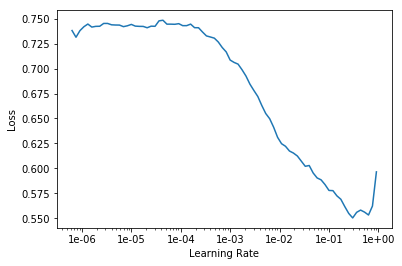

In [42]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(1,2e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.349817,0.271961,0.889200,06:56


We're already up nearly to 92% accuracy after less than three minutes of training. So this is a nice thing. In your particular domain (whether it be law, medicine, journalism, government, or whatever), you probably only need to train your domain's language model once. And that might take overnight to train well. But once you've got it, you can now very quickly create all kinds of different classifiers and models with that. In this case, already a pretty good model after three minutes. So when you first start doing this. you might find it a bit annoying that your first models take four hours or more to create that language model. But the key thing to remember is you only have to do that once for your entire domain of stuff that you're interested in. And then you can build lots of different classifiers and other models on top of that in a few minutes.

In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [46]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(1e-2/(2.6**4),1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.292109,0.212522,0.917960,07:21


We can save that to make sure we don't have to run it again.

And then, here's something interesting. I'm not going to say **unfreeze**. Instead, I'm going to say **freeze_to**. What that says is unfreeze the last two layers, don't unfreeze the whole thing. **We've just found it really helps with these text classification not to unfreeze the whole thing, but to unfreeze one layer at a time**. **--> important note** 

- unfreeze the last two layers
- train it a little bit more
- unfreeze the next layer again
- train it a little bit more
- unfreeze the whole thing
- train it a little bit more

In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [49]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,slice(5e-3/(2.6**4),5e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.246719,0.177915,0.931520,10:17


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [52]:
learn.unfreeze()
learn.fit_one_cycle(2,slice(1e-3/(2.6**4),1e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.206873,0.172875,0.933480,11:59
1,0.199514,0.170912,0.934920,12:38


You also see I'm passing in this thing (moms=(0.8,0.7))﹣momentums equals 0.8,0.7. We are going to learn exactly what that means probably next week. We may even automate it. So maybe by the time you watch the video of this, this won't even be necessary anymore. Basically we found for training recurrent neural networks (RNNs), it really helps to decrease the momentum a little bit. So that's what that is.

That gets us a 94.4% accuracy after about half an hour or less of training. There's quite a lot less of training the actual classifier. We can actually get this quite a bit better with a few tricks. I don't know if we'll learn all the tricks this part. It might be next part. But even this very simple standard approach is pretty great.

![alt text](https://github.com/hiromis/notes/raw/master/lesson4/2.png?raw=true)

If we compare it to last year's state of the art on IMDb, this is from The [CoVe paper](https://papers.nips.cc/paper/7209-learned-in-translation-contextualized-word-vectors.pdf) from McCann et al. at Salesforce Research. Their paper was 91.8% accurate. And the best paper they could find, they found a fairly domain-specific sentiment analysis paper from 2017, they've got 94.1%. And here, we've got 94.4%. And the best models I've been able to build aince have been about 95.1%. So if you're looking to do text classification, this really standardized transfer learning approach works super well.

In [53]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([5.6003e-04, 9.9944e-01]))

In [59]:
learn.predict('the movie is very messy')

(Category neg, tensor(0), tensor([0.9064, 0.0936]))

In [0]:
'''
??learn.predict()

def predict(self, item:ItemBase, **kwargs):
        "Return predicted class, label and probabilities for `item`."
        batch = self.data.one_item(item)
        res = self.pred_batch(batch=batch)
        pred,x = res[0],batch[0]
        norm = getattr(self.data,'norm',False)
        if norm:
            x = self.data.denorm(x)
            if norm.keywords.get('do_y',False): pred = self.data.denorm(pred)
        ds = self.data.single_ds
        pred = ds.y.analyze_pred(pred, **kwargs)
        out = ds.y.reconstruct(pred, ds.x.reconstruct(x[0])) if has_arg(ds.y.reconstruct, 'x') else ds.y.reconstruct(pred)
        return out, pred, res[0]
        
'''

**Question**: Where does the magic number of 2.6^{4} in the learning rate come from? [33:38](https://youtu.be/C9UdVPE3ynA?t=2018)

`learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))`

Good question. So the learning rate is various things divided by 2.6 to the fourth. The reason it's to the fourth, you will learn about at the end of today. So let's focus on the 2.6. Why 2.6? Basically, as we're going to see in more detail later today, this number, the difference between the bottom of the slice and the top of the slice is basically what's the difference between how quickly the lowest layer of the model learns versus the highest layer of the model learns. So this is called discriminative learning rates. So really the question is as you go from layer to layer, how much do I decrease the learning rate by? And we found out that for NLP RNNs, the answer is 2.6.

How do we find out that it's 2.6? I ran lots and lots of different models using lots of different sets of hyper parameters of various types (dropout, learning rates, and discriminative learning rate and so forth), and then I created something called a random forest which is a kind of model where I attempted to predict how accurate my NLP classifier would be based on the hyper parameters. And then I used random forest interpretation methods to basically figure out what the optimal parameter settings were, and I found out that the answer for this number was 2.6. So that's actually not something I've published or I don't think I've even talked about it before, so there's a new piece of information. Actually, a few months after I did this, Stephen Merity and somebody else did publish a paper describing a similar approach, so the basic idea may be out there already.

Some of that idea comes from a researcher named Frank Hutter and one of his collaborators. They did some interesting work showing how you can use random forests to actually find optimal hyperparameters. So it's kind of a neat trick. A lot of people are very interested in this thing called Auto ML which is this idea of like building models to figure out how to train your model. We're not big fans of it on the whole. But we do find that building models to better understand how your hyper parameters work, and then finding those rules of thumb like oh basically it can always be 2.6 quite helpful. So there's just something we've kind of been playing with.